In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('/Users/FABIO/Desktop/Boolean/VSCode/ProjectBoolean/Website activity.csv')
df

,user_id,gender,age,uri,event_type,ip_address,browser,traffic_source,user_latitude,user_longitude,user_city,user_country,event_count
0,56457,M,13,/cart,cart,33.179.231.10,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,4
1,66942,M,20,/cart,cart,13.12.24.19,Other,Email,51.221528,15.726955,Bogatynia,Poland,2
2,13383,M,16,/cart,cart,182.126.173.89,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,4
3,53280,M,26,/cart,cart,53.217.160.129,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,2
4,99482,M,61,/cart,cart,65.61.189.196,Chrome,Adwords,51.221528,15.726955,Bogatynia,Poland,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
814390,54479,M,33,/department/men/category/pants/brand/fox,department,5.172.111.142,IE,Email,-28.276710,-52.855971,Carazinho,Brasil,2
814391,20707,M,67,/department/men/category/underwear/brand/micha...,department,33.83.193.118,Firefox,Adwords,-28.276710,-52.855971,Carazinho,Brasil,2
814392,35599,M,28,/department/men/category/suits&sportcoats/bran...,department,215.51.96.146,Chrome,YouTube,-28.276710,-52.855971,Carazinho,Brasil,1
814393,97399,M,52,/department/men/category/jeans/brand/earnestsewn,department,199.108.38.53,Firefox,Email,-27.643801,-52.257230,Erechim,Brasil,1


In [115]:
print(df['event_type'].unique())


['cart' 'home' 'product' 'purchase' 'department']


In [116]:
print(df['browser'].unique())


['Firefox' 'Other' 'Chrome' 'Safari' 'IE']


In [117]:
print(df['traffic_source'].unique())


['Email' 'Adwords' 'YouTube' 'Facebook' 'Organic']


In [118]:
print(df['user_country'].unique())

['Poland' 'United Kingdom' 'Australia' 'Belgium' 'United States' 'Spain'
 'Germany' 'France' 'Brasil' 'China' 'España' 'Colombia' 'South Korea'
 'Japan' 'Austria']


In [119]:
print(df['event_type'].isna().sum())
print(df['browser'].isnull().sum())
print(df['traffic_source'].isna().sum())
print(df['user_country'].isnull().sum())

0
0
0
0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814395 entries, 0 to 814394
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         814395 non-null  int64  
 1   gender          814395 non-null  object 
 2   age             814395 non-null  int64  
 3   uri             814395 non-null  object 
 4   event_type      814395 non-null  object 
 5   ip_address      814395 non-null  object 
 6   browser         814395 non-null  object 
 7   traffic_source  814395 non-null  object 
 8   user_latitude   814395 non-null  float64
 9   user_longitude  814395 non-null  float64
 10  user_city       806305 non-null  object 
 11  user_country    814395 non-null  object 
 12  event_count     814395 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 80.8+ MB


In [121]:
df['user_city'].fillna('Unknown', inplace=True)

In [122]:
df['event_type'] = df['event_type'].apply(str)
df['browser'] = df['browser'].apply(str)
df['traffic_source'] = df['traffic_source'].apply(str)
df['user_country'] = df['user_country'].apply(str)

In [123]:
df.drop(columns=['ip_address'], inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814395 entries, 0 to 814394
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         814395 non-null  int64  
 1   gender          814395 non-null  object 
 2   age             814395 non-null  int64  
 3   uri             814395 non-null  object 
 4   event_type      814395 non-null  object 
 5   browser         814395 non-null  object 
 6   traffic_source  814395 non-null  object 
 7   user_latitude   814395 non-null  float64
 8   user_longitude  814395 non-null  float64
 9   user_city       814395 non-null  object 
 10  user_country    814395 non-null  object 
 11  event_count     814395 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 74.6+ MB


In [125]:
df.groupby(['user_country', 'user_city', 'user_id'])['event_count'].sum().sort_values(ascending=False).head(10) #top10 utenti con più visualizzazioni tramite colonna 'event_COUNT' con nazione e città

user_country   user_city            user_id
Poland         Bogatynia            1635       164
South Korea    Seoul                21539      161
United States  Bethel Park          9186       161
Brasil         Campinas             56615      156
Poland         Gorzów Wielkopolski  35520      148
France         Issy-les-Moulineaux  1629       139
               Lure                 81497      139
               Nancy                33736      139
China          Ganzhou              20404      139
Brasil         Curitiba             1029       139
Name: event_count, dtype: int64

<Axes: title={'center': 'Top 10 Users by Event Count'}, ylabel='user_country,user_city,user_id'>

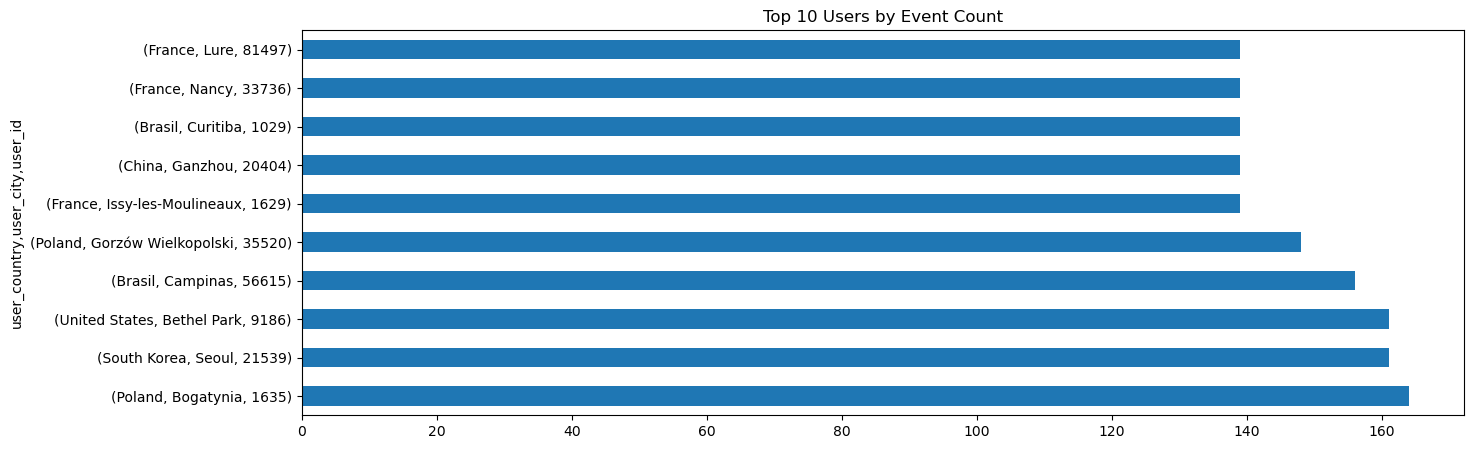

In [139]:
df.groupby(['user_country', 'user_city', 'user_id'])['event_count'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(15, 5), title='Top 10 Users by Event Count')

In [127]:
df.groupby(df['user_country'])['event_count'].sum().sort_values(ascending=False) #Paesi con più visualizzazioni

user_country
China             444644
United States     292574
Brasil            190542
South Korea        68148
France             62318
United Kingdom     60148
Germany            53949
Spain              52699
Japan              32550
Australia          30247
Belgium            16379
Poland              3397
Colombia             178
España               118
Austria               10
Name: event_count, dtype: int64

In [128]:
df.groupby(df['user_city'])['event_count'].sum().sort_values(ascending=False) #Città con più visualizzazioni

user_city
Shanghai                31975
Beijing                 26534
Seoul                   19893
Shenzhen                16811
Dongguan                13378
                        ...  
Dillingen/Saar              5
Saint-Cyr-les-Vignes        5
Wattignies                  5
Doberschütz                 5
Calasparra                  5
Name: event_count, Length: 7594, dtype: int64

In [129]:
df['event_type'].value_counts() #Valori contati per tipo di evento

cart          181765
product       181765
purchase      181765
department    181765
home           87335
Name: event_type, dtype: int64

In [130]:
df.groupby(['traffic_source'])['event_count'].sum().sort_values(ascending=False) #Visualizzazioni in termini di fonte

traffic_source
Email       589093
Adwords     390799
Facebook    132800
YouTube     130242
Organic      64967
Name: event_count, dtype: int64

In [131]:
df.groupby(['user_country', 'traffic_source'])['event_count'].sum().sort_values(ascending=False) #Traffic source per country

user_country   traffic_source
China          Email             200317
               Adwords           133110
United States  Email             132489
               Adwords            86779
Brasil         Email              86163
                                  ...  
España         Facebook              26
               YouTube               13
               Organic                7
Austria        YouTube                5
               Adwords                5
Name: event_count, Length: 71, dtype: int64

In [147]:
df.groupby('gender').nunique()

,user_id,age,uri,event_type,browser,traffic_source,user_latitude,user_longitude,user_city,user_country,event_count
gender,,,,,,,,,,,
F,40205,59,19719,5,5,5,12780,12736,6321,14,4
M,39715,59,15748,5,5,5,12775,12731,6354,14,4


In [132]:
df.groupby(['browser'])['event_count'].sum().sort_values(ascending=False) #Visualizzazioni per browser

browser
Chrome     653295
Firefox    261774
Safari     261770
IE          65721
Other       65341
Name: event_count, dtype: int64

In [133]:
df.groupby('uri')['event_count'].sum().sort_values(ascending=False).head(10)

uri
/cart                                                             346267
/purchase                                                         181765
/home                                                              87335
/department/women/category/maternity/brand/motherhoodmaternity      1950
/department/women/category/blazers&jackets/brand/allegrak           1751
/department/men/category/jeans/brand/wrangler                       1532
/department/men/category/swim/brand/quiksilver                      1332
/department/women/category/dresses/brand/allegrak                   1326
/department/women/category/jeans/brand/levi's                       1322
/department/women/category/swim/brand/speedo                        1306
Name: event_count, dtype: int64

In [43]:
df2 = pd.read_csv('/Users/FABIO/Desktop/Boolean/VSCode/ProjectBoolean/Demographic composition.csv')
df2

,user_id,gender,age,state,city,country,latitude,longitude,traffic_source,num_orders,avg_items_per_order
0,90184,M,16,Mie,Suzuka City,Japan,34.851814,136.508713,Search,1,1.000000
1,7561,M,23,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Display,0,NaN
2,25254,M,44,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,0,NaN
3,33690,M,35,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,1,2.000000
4,57553,M,32,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,3,1.333333
...,...,...,...,...,...,...,...,...,...,...,...
99995,73279,F,58,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.280208,126.346231,Search,1,1.000000
99996,13737,F,47,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.220465,126.237860,Facebook,0,NaN
99997,27384,M,47,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.305744,126.675429,Search,1,1.000000
99998,37311,M,40,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.305744,126.675429,Search,2,1.000000


In [52]:
df = df.merge(df2[['user_id', 'gender', 'age']], how='left', on='user_id')
df

,user_id,uri,event_type,browser,traffic_source,user_latitude,user_longitude,user_city,user_country,event_count,gender,age
0,49385,/cart,cart,Chrome,Email,51.221528,15.726955,Bogatynia,Poland,1,F,55
1,42343,/cart,cart,Chrome,Adwords,51.221528,15.726955,Bogatynia,Poland,1,F,47
2,52127,/cart,cart,Chrome,Adwords,51.221528,15.726955,Bogatynia,Poland,4,F,42
3,16170,/cart,cart,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,1,F,48
4,49958,/cart,cart,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,2,F,45
...,...,...,...,...,...,...,...,...,...,...,...,...
810927,61106,/department/women/category/active/brand/ibex,department,Chrome,Organic,-28.448674,-52.268193,Marau,Brasil,1,M,59
810928,99302,/department/women/category/jeans/brand/wrangler,department,Safari,Facebook,-28.448674,-52.268193,Marau,Brasil,1,M,14
810929,17481,/department/women/category/dresses/brand/laund...,department,Chrome,Adwords,-28.276710,-52.855971,Carazinho,Brasil,1,F,43
810930,37285,/department/men/category/tops&tees/brand/dc,department,Chrome,Email,-27.643801,-52.257230,Erechim,Brasil,1,F,58


In [54]:
df = df[['user_id', 'gender', 'age', 'uri', 'event_type', 'browser', 'traffic_source', 'user_latitude', 'user_longitude', 'user_city', 'user_country', 'event_count']]
df

,user_id,gender,age,uri,event_type,browser,traffic_source,user_latitude,user_longitude,user_city,user_country,event_count
0,49385,F,55,/cart,cart,Chrome,Email,51.221528,15.726955,Bogatynia,Poland,1
1,42343,F,47,/cart,cart,Chrome,Adwords,51.221528,15.726955,Bogatynia,Poland,1
2,52127,F,42,/cart,cart,Chrome,Adwords,51.221528,15.726955,Bogatynia,Poland,4
3,16170,F,48,/cart,cart,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,1
4,49958,F,45,/cart,cart,Firefox,Email,51.221528,15.726955,Bogatynia,Poland,2
...,...,...,...,...,...,...,...,...,...,...,...,...
810927,61106,M,59,/department/women/category/active/brand/ibex,department,Chrome,Organic,-28.448674,-52.268193,Marau,Brasil,1
810928,99302,M,14,/department/women/category/jeans/brand/wrangler,department,Safari,Facebook,-28.448674,-52.268193,Marau,Brasil,1
810929,17481,F,43,/department/women/category/dresses/brand/laund...,department,Chrome,Adwords,-28.276710,-52.855971,Carazinho,Brasil,1
810930,37285,F,58,/department/men/category/tops&tees/brand/dc,department,Chrome,Email,-27.643801,-52.257230,Erechim,Brasil,1


In [134]:
df3 = df.groupby(['gender', 'age'])['event_count'].sum().sort_values(ascending=False) #Visualizzazioni per genere
df3

gender  age
F       66     12293
        48     12219
M       59     12148
        21     12135
F       27     11926
               ...  
M       20     10104
        62     10064
F       28     10036
M       17      9895
F       29      9895
Name: event_count, Length: 118, dtype: int64

In [75]:
file_path = 'Website_activity.csv'
df.to_csv(file_path, index=False)

In [135]:
df['user_country'] = df['user_country'].replace('Deutschland', 'Germany')

In [136]:
df['user_country'] = df['user_country'].str.replace('España', 'Spain')

In [137]:
df['user_country'].unique()

array(['Poland', 'United Kingdom', 'Australia', 'Belgium',
       'United States', 'Spain', 'Germany', 'France', 'Brasil', 'China',
       'Colombia', 'South Korea', 'Japan', 'Austria'], dtype=object)

In [138]:
file_path = 'Website_activity.csv'
df.to_csv(file_path, index=False)